In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import dolfin as dl
import numpy as np

from hippylib import *

import ipywidgets as wd

import logging
logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)

Helmholtz given by

[ TODO ]

Obstruction is characterized by 
$$ \log( 40 - 20[ (x-0.5)^2 + (y-0.5)^2 < r^2 )], r>0 $$

In [2]:
def helm(n=64, r = 0.2, s1x=0.1, s1y=0.1, s2x=0.5, s2y=0.1):
    # create mesh and define function spaces
    nx, ny = n, n
    mesh = dl.UnitSquareMesh(nx, ny)
    Vk = dl.FunctionSpace(mesh, 'Lagrange', 1)
    Vu = dl.FunctionSpace(mesh, 'Lagrange', 2)
    # define function for state, wavenumber and adjoint
    u = dl.Function(Vu)
    k = dl.Function(Vk)
    p = dl.Function(Vu)

    # define Trial and Test Functions
    u_trial, k_trial, p_trial = dl.TrialFunction(Vu), dl.TrialFunction(Vk), dl.TrialFunction(Vu)
    u_test,  k_test,  p_test  = dl.TestFunction(Vu),  dl.TestFunction(Vk),  dl.TestFunction(Vu)
    

    # define boundary
    def boundary(x, on_boundary):
        return on_boundary
    bc_state = dl.DirichletBC(Vu, dl.Constant(0.0), boundary)
    
    # define weak form of Helmholtz equation for synthetics 
    eqstr = 'std::log( 40. - 20.*(pow(x[0] - 0.5,2) + pow(x[1] - 0.5,2) < pow({},2) ) )'.format(r)
    ktrue = dl.interpolate(dl.Expression(eqstr, degree=5), Vk)
    #ktrue = dl.interpolate(dl.Constant(5), Vk)
    a_true = (-dl.inner(dl.grad(u_trial), dl.grad(u_test)) + dl.inner(dl.exp(2*ktrue)*u_trial, u_test)) * dl.dx
    L_true = dl.Constant(0.0) * u_test * dl.dx

    A, b = dl.assemble_system(a_true, L_true, bc_state)
    # define source(s)
    if np.minimum(s1x, s1y) > 0:
        sp1 = dl.Point(s1x,s1y)
        ps1 = dl.PointSource(Vu, sp1, 1.0)
        ps1.apply(b)
    if np.minimum(s2x, s2y) > 0:
        sp2 = dl.Point(s2x, s2y)
        ps2 = dl.PointSource(Vu, sp2, 1.0)
        ps2.apply(b)
    
    dl.solve(A, u.vector(),b)
    
    # plot
    plt.figure(figsize=(15,5))
#     nb.plot(mesh,subplot_loc=121, mytitle="Mesh", show_axis='on')
    nb.plot(u, subplot_loc=121, mytitle="Displacement Field", vmin=-0.7, vmax=0.3)
    if np.minimum(s1x, s1y) > 0:
        nb.plt.scatter(s1x, s1y, facecolor='white')
    if np.minimum(s2x, s2y) > 0:
        nb.plt.scatter(s2x, s2y, facecolor='white')
    nb.plot(ktrue, subplot_loc=122, mytitle="True parameter field")
    plt.show()
    return None
    

In [3]:
u = wd.interact(helm, 
            n = wd.IntSlider(value=64, min=10, max=128, continuous_update=False),
            r = wd.FloatSlider(value=0.2, min=0, max=1, step=0.05, continuous_update=False),
            s1x = wd.FloatSlider(value=0.1, min=0, max=1, step=0.05, continuous_update=False),
            s1y = wd.FloatSlider(value=0.1, min=0, max=1, step=0.05, continuous_update=False),
            s2x = wd.FloatSlider(value=0.9, min=0, max=1, step=0.05, continuous_update=False),
            s2y = wd.FloatSlider(value=0.1, min=0, max=1, step=0.05, continuous_update=False)
           )


interactive(children=(IntSlider(value=64, continuous_update=False, description='n', max=128, min=10), FloatSlider(value=0.2, continuous_update=False, description='r', max=1.0, step=0.05), FloatSlider(value=0.1, continuous_update=False, description='s1x', max=1.0, step=0.05), FloatSlider(value=0.1, continuous_update=False, description='s1y', max=1.0, step=0.05), FloatSlider(value=0.9, continuous_update=False, description='s2x', max=1.0, step=0.05), FloatSlider(value=0.1, continuous_update=False, description='s2y', max=1.0, step=0.05), Output()), _dom_classes=('widget-interact',))

## How I would get data out of this... 

In [4]:
def hh(n=64, r = 0.2, s1x=0.1, s1y=0.1, s2x=0.5, s2y=0.1):
    # create mesh and define function spaces
    nx, ny = n, n
    mesh = dl.UnitSquareMesh(nx, ny)
    Vk = dl.FunctionSpace(mesh, 'Lagrange', 1)
    Vu = dl.FunctionSpace(mesh, 'Lagrange', 2)
    # define function for state, wavenumber and adjoint
    u = dl.Function(Vu)
    k = dl.Function(Vk)
    p = dl.Function(Vu)

    # define Trial and Test Functions
    u_trial, k_trial, p_trial = dl.TrialFunction(Vu), dl.TrialFunction(Vk), dl.TrialFunction(Vu)
    u_test,  k_test,  p_test  = dl.TestFunction(Vu),  dl.TestFunction(Vk),  dl.TestFunction(Vu)
    

    # define boundary
    def boundary(x, on_boundary):
        return on_boundary
    bc_state = dl.DirichletBC(Vu, dl.Constant(0.0), boundary)
    
    # define weak form of Helmholtz equation for synthetics 
    eqstr = 'std::log( 40. - 20.*(pow(x[0] - 0.5,2) + pow(x[1] - 0.5,2) < pow({},2) ) )'.format(r)
    ktrue = dl.interpolate(dl.Expression(eqstr, degree=5), Vk)
    #ktrue = dl.interpolate(dl.Constant(5), Vk)
    a_true = (-dl.inner(dl.grad(u_trial), dl.grad(u_test)) + dl.inner(dl.exp(2*ktrue)*u_trial, u_test)) * dl.dx
    L_true = dl.Constant(0.0) * u_test * dl.dx

    A, b = dl.assemble_system(a_true, L_true, bc_state)
    # define source(s)
    if np.minimum(s1x, s1y) > 0:
        sp1 = dl.Point(s1x,s1y)
        ps1 = dl.PointSource(Vu, sp1, 1.0)
        ps1.apply(b)
    if np.minimum(s2x, s2y) > 0:
        sp2 = dl.Point(s2x, s2y)
        ps2 = dl.PointSource(Vu, sp2, 1.0)
        ps2.apply(b)
    
    dl.solve(A, u.vector(),b)
    
    # plot
#     plt.figure(figsize=(15,5))
# #     nb.plot(mesh,subplot_loc=121, mytitle="Mesh", show_axis='on')
#     nb.plot(u, subplot_loc=121, mytitle="Displacement Field", vmin=-0.7, vmax=0.3)
#     if np.minimum(s1x, s1y) > 0:
#         nb.plt.scatter(s1x, s1y, facecolor='white')
#     if np.minimum(s2x, s2y) > 0:
#         nb.plt.scatter(s2x, s2y, facecolor='white')
#     nb.plot(ktrue, subplot_loc=122, mytitle="True parameter field")
#     plt.show()
    
    return u

In [5]:
u = hh()

In [6]:
ns = 9
x_samps = np.linspace(0.1, 0.9, ns)
y_samps = 0.9*np.ones(9)
sample_locs = np.vstack([x_samps, y_samps]).T

In [7]:
u_eval = []
for i in range(ns):
    u_eval.append(u(*sample_locs[i,:]))
u_eval = np.array(u_eval).reshape(-1,1)
u_eval

array([[ 0.04256083],
       [-0.09736842],
       [-0.00406872],
       [ 0.00643653],
       [ 0.20347954],
       [ 0.09283479],
       [ 0.02072406],
       [ 0.01844977],
       [-0.00054087]])

# How Jack gets data out of this


In [8]:
import sys
sys.path.insert(0,'/home/fenics/Installations/MUQ_INSTALL/lib')

import pymuqModeling as mm
import pymuqApproximation as ma


In [9]:
ndim = 2
nx = 32
ny = 32
mesh = dl.UnitSquareMesh(nx, ny)
Vh2 = dl.FunctionSpace(mesh, 'Lagrange', 2)
Vh1 = dl.FunctionSpace(mesh, 'Lagrange', 1)
Vh = [Vh2, Vh1, Vh2]
print( "Number of dofs: STATE={0}, PARAMETER={1}, ADJOINT={2}".format(
    Vh[STATE].dim(), Vh[PARAMETER].dim(), Vh[ADJOINT].dim()) )

Number of dofs: STATE=4225, PARAMETER=1089, ADJOINT=4225


In [11]:
f = dl.Constant(0.0)
g = dl.Constant(1.0)
omega = dl.Constant(0.5)


def pde_varf(u,m,p):
    return -dl.inner(dl.nabla_grad(u), dl.nabla_grad(p))*dl.dx + omega*omega*dl.exp(2*m)*dl.inner(u, p)*dl.dx - f*p*dl.dx  + m*p*dl.ds
    
pde = PDEVariationalProblem(Vh, pde_varf, [], [], is_fwd_linear=True)


  Ignoring precision in integral metadata compiled using quadrature representation. Not implemented.
  Ignoring precision in integral metadata compiled using quadrature representation. Not implemented.
Prior regularization: (delta_x - gamma*Laplacian)^order: delta=8, gamma=1, order=2


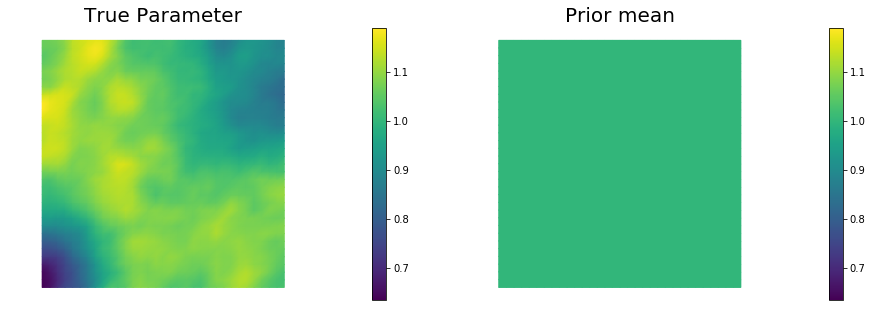

In [12]:
gamma = 1
delta = 8
prior = BiLaplacianPrior(Vh[PARAMETER], gamma, delta)

prior.mean = dl.interpolate(dl.Constant(1), Vh[PARAMETER]).vector()

def true_model(prior):
    noise = dl.Vector()
    prior.init_vector(noise,"noise")
    parRandom.normal(1., noise)
    mtrue = dl.Vector()
    prior.init_vector(mtrue, 0)
    prior.sample(noise,mtrue)
    return mtrue

print("Prior regularization: (delta_x - gamma*Laplacian)^order: delta={0}, gamma={1}, order={2}".format(delta, gamma,2))    


mtrue = true_model(prior)
                   
objs = [dl.Function(Vh[PARAMETER],mtrue), dl.Function(Vh[PARAMETER],prior.mean)]
mytitles = ["True Parameter", "Prior mean"]
nb.multi1_plot(objs, mytitles)
plt.show()

model = Model(pde,prior, misfit)